In [21]:
#Platform: Jupyter Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [25]:
#read csv file
ingredient = pd.read_csv('C:/Users/User/Downloads/PreScreen_r3_pw - 1234/PreScreen_r3/ingredient.csv')
ingredient.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [31]:
#data cleaning- to check missing values
print('The total missing values is: ',ingredient.isna().sum().sum())

The total missing values is:  0


# Q1
## Section a.

In [63]:
#1.1.1 summary statistics
sum_stats = ingredient.describe()
sum_stats

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [65]:
sum_stats.loc['range'] = sum_stats.loc['max'] - sum_stats.loc['min']
sum_stats.loc['IQR'] = sum_stats.loc['75%'] - sum_stats.loc['25%']
sum_stats

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000
range,0.022780,6.650000,4.490000,3.210000,5.600000,6.210000,10.760000,3.150000,0.510000
IQR,0.002635,0.917500,1.485000,0.440000,0.807500,0.487500,0.932500,0.000000,0.100000


In [27]:
#1.1.2 correlation
correlation = ingredient.corr()
correlation

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [39]:
#1.1.3 ANOVA analysis
anova = stats.f_oneway(ingredient['a'], ingredient['b'], ingredient['c'], ingredient['d'], 
                       ingredient['e'], ingredient['f'], ingredient['g'], ingredient['h'], ingredient['i'])
print("ANOVA:\n", anova)

ANOVA:
 F_onewayResult(statistic=168331.96885835085, pvalue=0.0)


## Section b.


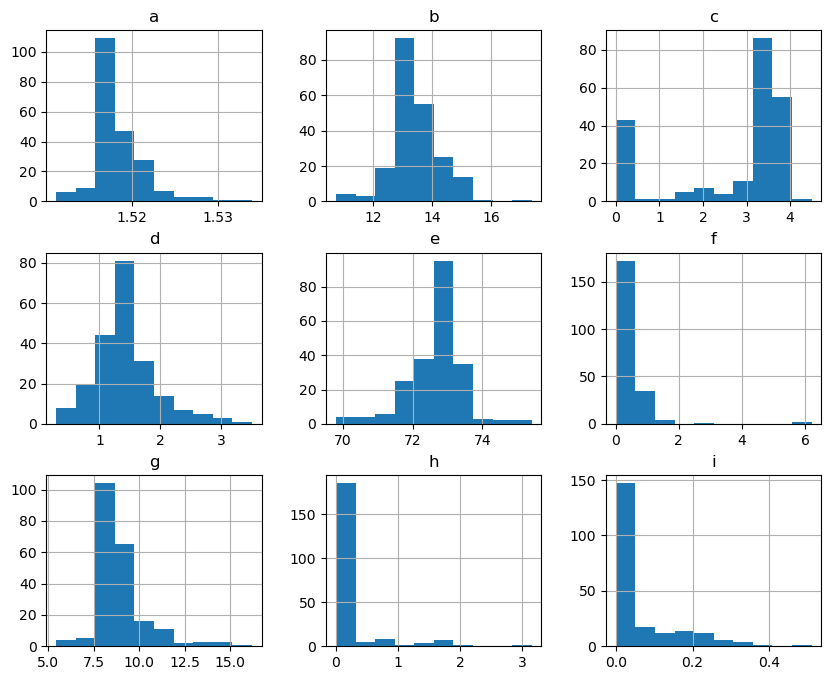

In [42]:
#1.2.1 Histograms
ingredient.hist(figsize=(10, 8))
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


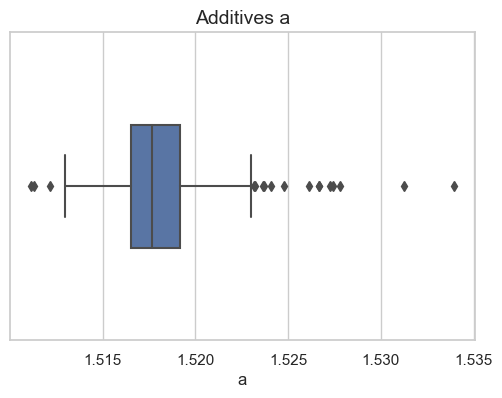

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


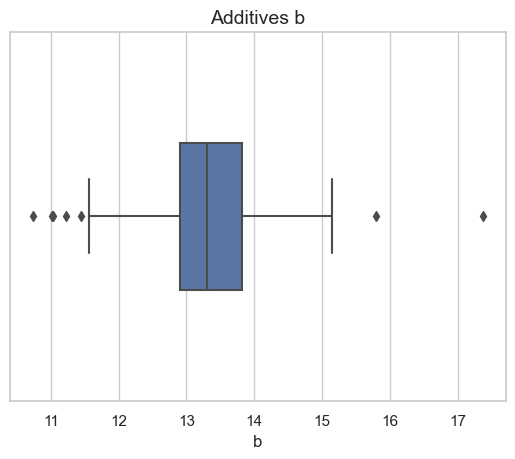

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


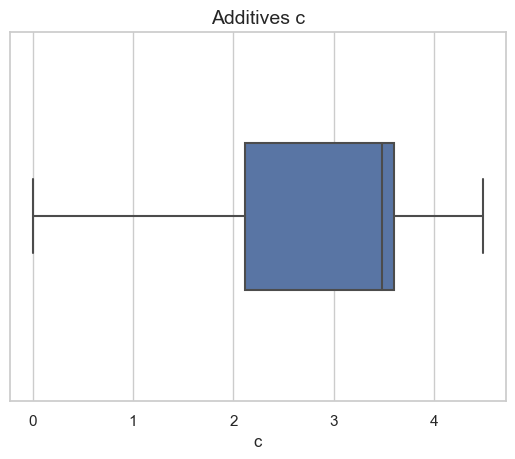

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


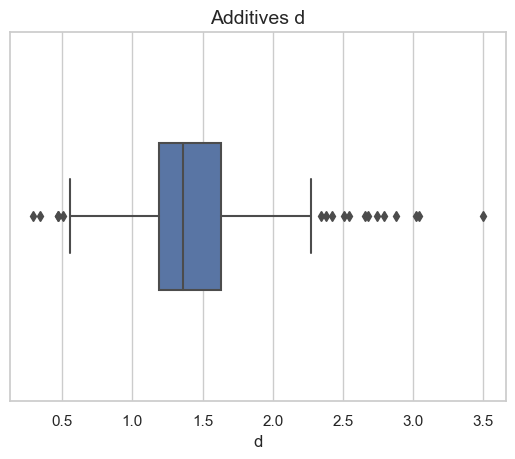

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


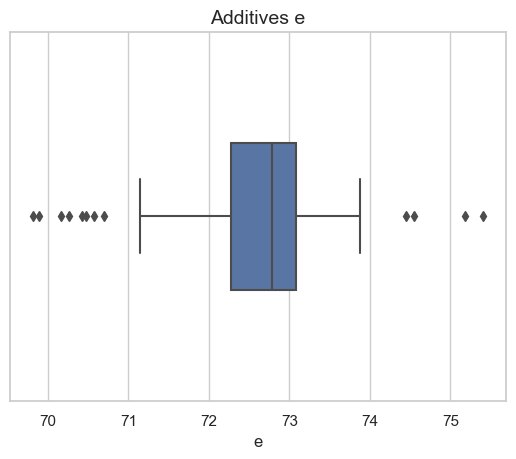

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


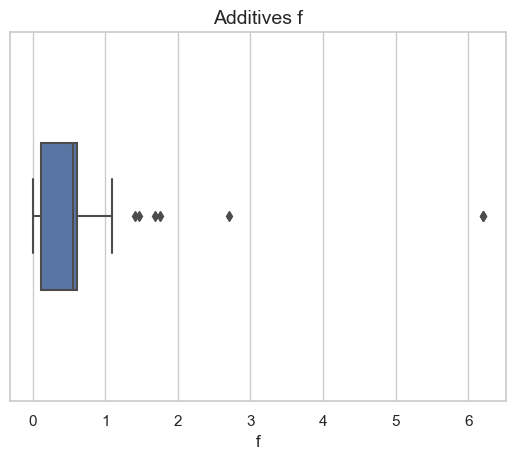

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


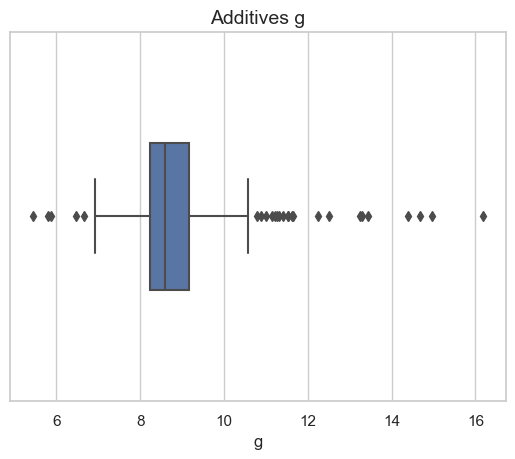

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


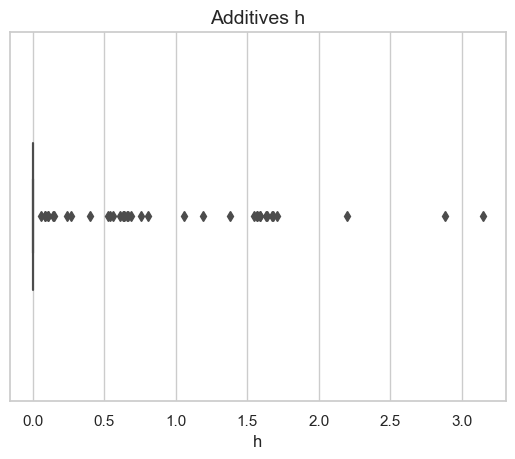

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


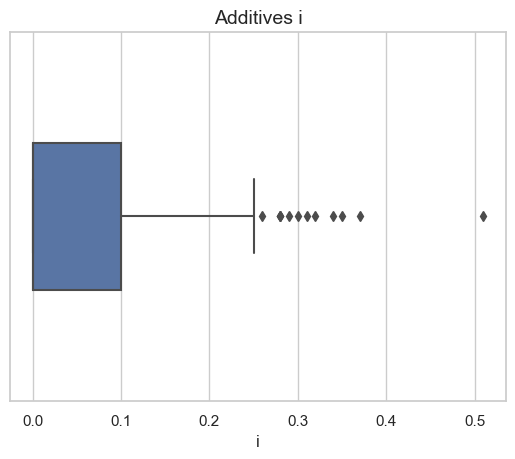

In [74]:
#1.2.2
# Box plots-detection of outliers
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
for column in ingredient.columns:
    sns.boxplot(x=ingredient[column], orient="v", width=0.4)
    plt.title(f"Additives {column}", fontsize=14)
    plt.show()

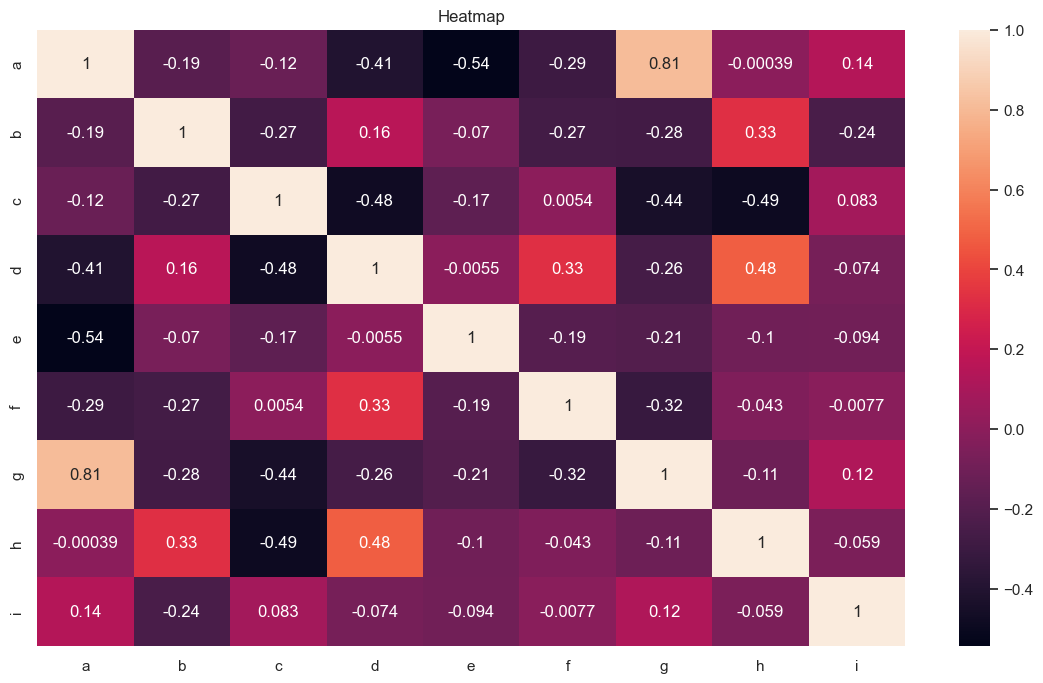

In [75]:
#1.2.3
# Heatmap for correlation
plt.figure(figsize=(14, 8))
plt.title('Heatmap')
sns.heatmap(correlation, annot=True)
plt.show()

# Section C

In [114]:
# Continue with Jupyter Notebook
#1.3 K-Means Clustering
!pip install yellowbrick


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#read csv file
ingredient2 = pd.read_csv('C:/Users/User/Downloads/PreScreen_r3_pw - 1234/PreScreen_r3/ingredient.csv')
ingredient2.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [13]:
scaler = StandardScaler()

# Fit the scaler to data and transform it
ingredient2_scaled = scaler.fit_transform(ingredient2)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

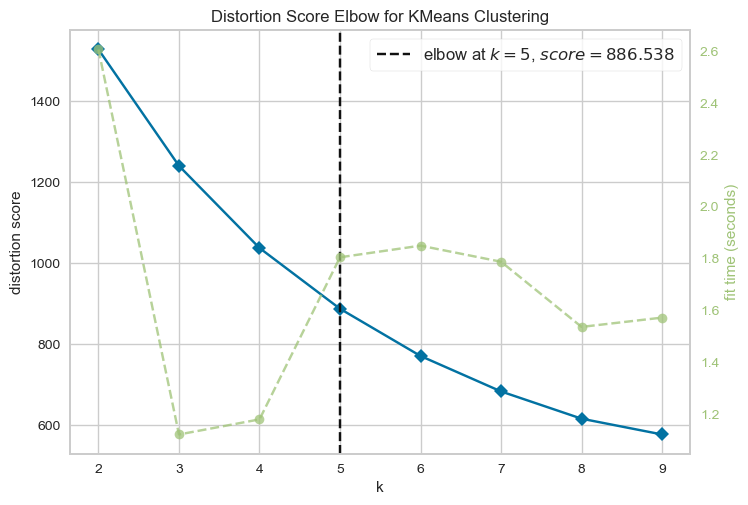

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
#Determination of best number of clusters with elbow method
## Instantiate the K-means model
k_mean = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with a range of clusters
visualizer = KElbowVisualizer(k_mean, k=(2,10))

# Fit the visualizer to the data
visualizer.fit(ingredient2_scaled)
visualizer.show() 

In [15]:
#set the number of cluster or with elbow method 
kmeans = KMeans(n_clusters=5)
#fit the model
kmeans.fit(ingredient2_scaled)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
#get the cluster center
centroids = kmeans.cluster_centers_
centroids

array([[ 2.09620832, -1.43348468, -1.67093555, -0.09732543, -0.41255041,
        -0.27650615,  2.85259222,  0.10070084,  0.3246768 ],
       [-0.39244505, -0.36579004,  0.48111608, -0.11007473,  0.29067221,
         0.14704666, -0.3767588 , -0.32263832,  0.08782493],
       [ 0.97667911,  0.61636629,  0.28259084, -0.79569105, -0.96839992,
        -0.44702733,  0.478724  , -0.21368368, -0.05251047],
       [-1.70984521, -0.48834381, -1.86551055,  3.18226832, -2.66706863,
         8.78014487, -1.41705025, -0.35287683, -0.5864509 ],
       [-0.59695648,  1.49925763, -1.65455551,  1.51809318,  0.52059274,
        -0.49057244, -0.32083828,  1.77029862, -0.44316872]])

In [17]:
#label assigned to each data point
kmeans_labels = kmeans.labels_

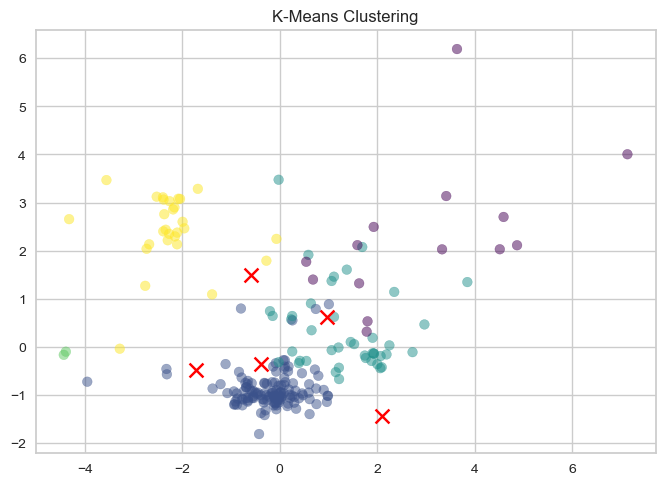

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(ingredient2_scaled)

# Concatenate the PCA-transformed data with the cluster labels
data_with_labels = np.column_stack((X_pca, kmeans_labels))

# Visualize clusters
plt.scatter(data_with_labels[:, 0], data_with_labels[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red') 
plt.title('K-Means Clustering')
plt.show()